# Importing liabraries 

In [3]:
import time
import pandas as pd
import numpy as np
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import warnings
warnings.filterwarnings('ignore')


In [ ]:
base_url = 'https://in.indeed.com/jobs?q=python+developer&start='


In [39]:
# Initializing Edge WebDriver
driver = webdriver.Edge()
driver.get(base_url)


In [40]:
# Finding the job listings on the page
data = driver.find_elements(By.CLASS_NAME, 'resultContent')

In [42]:
data


[<selenium.webdriver.remote.webelement.WebElement (session="4fb580435a6eb66db1467e24be223d69", element="14F3579C41D9C93391ED37262CD76F8A_element_43")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4fb580435a6eb66db1467e24be223d69", element="14F3579C41D9C93391ED37262CD76F8A_element_44")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4fb580435a6eb66db1467e24be223d69", element="14F3579C41D9C93391ED37262CD76F8A_element_45")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4fb580435a6eb66db1467e24be223d69", element="14F3579C41D9C93391ED37262CD76F8A_element_46")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4fb580435a6eb66db1467e24be223d69", element="14F3579C41D9C93391ED37262CD76F8A_element_47")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4fb580435a6eb66db1467e24be223d69", element="14F3579C41D9C93391ED37262CD76F8A_element_48")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4fb580435a6eb66db1467e24be22

In [43]:
# Getting total number of pages for the job search
import math
import re

# Find the element that contains job count information
job_count_element = driver.find_element(By.CLASS_NAME, 'jobsearch-JobCountAndSortPane-jobCount')

# Extract the numeric part using regex
total_jobs_match = re.search(r'[\d,]+', job_count_element.text)

# Initialize the total_jobs variable
total_jobs = int(total_jobs_match.group().replace(',', '')) if total_jobs_match else 0

# Calculate the maximum number of pages, rounding up to the nearest integer
max_iter_pages = math.ceil(total_jobs / 15) if total_jobs > 0 else 0

print(f'Total job listings: {total_jobs}')
print(f'Maximum iterable pages for this search: {max_iter_pages}')


Total job listings: 9782
Maximum iterable pages for this search: 653


In [45]:
# Closing the webdriver
driver.quit()

In [46]:
# Extracting data from website

base_url = 'https://in.indeed.com/jobs?q=python+developer&start='
# Initializing Edge WebDriver
driver = webdriver.Edge()
# Finding the job listings on the page
data = driver.find_elements(By.CLASS_NAME, 'resultContent')

# Creating lists to store job titles, company names, locations, salaries, job types, and description links
job_titles = []
company_names = []
locations = []
salaries = []
job_types = []
description_links = []

# Loop through pages
for page in range(0, 700, 10):
    driver.get(base_url + str(page))
    time.sleep(5)  # Adding a sleep for page loads

    # Finding the job listings on the page
    data = driver.find_elements(By.CLASS_NAME, 'resultContent')

    # Loop through the job listings on the current page
    for card in data:
        try:
            # Find the "jobTitle" elements
            job_title = card.find_element(By.CLASS_NAME, 'jobTitle').text
            job_titles.append(job_title)

            # Find the company name elements
            company_name = card.find_element(By.CSS_SELECTOR, 'span[data-testid="company-name"]').text
            company_names.append(company_name)

            # Try to find the location elements
            try:
                location_element = card.find_element(By.CSS_SELECTOR, 'div.css-ozny1x.eu4oa1w0')
                location = location_element.text
            except NoSuchElementException:
                # If the first type of location is not found, trying to get second type
                try:
                    location_element = card.find_element(By.CSS_SELECTOR, 'div[data-testid="text-location"]')
                    location = location_element.text
                except NoSuchElementException:
                    location = "N/A"
            locations.append(location)

            # Try to find the element for "Job Type"
            metadata_elements = card.find_elements(By.CSS_SELECTOR, 'div.metadata div.css-1ihavw2')
            job_type = "N/A"
            # Iterate through metadata elements to differentiate between "Job Type" and "Salary"
            for metadata_element in metadata_elements:
                text = metadata_element.text
                if "Full-time" in text or "Part-time" in text:
                    job_type = text
                else:
                    pass
            job_types.append(job_type)

            # Create a different loop for salary extraction
            try:
                # Find the salary elements
                salary_element = card.find_element(By.CSS_SELECTOR, 'div.metadata.salary-snippet-container div.css-1ihavw2')
                salary = salary_element.text
                salaries.append(salary)
            except NoSuchElementException:
                # Handling cases where the salary element is not found
                salaries.append("N/A")

            # Extract the href links
            description_link = card.find_element(By.CLASS_NAME, 'jcs-JobTitle').get_attribute('href')
            description_links.append(description_link)

        except NoSuchElementException:
            # Handling cases where the elements are not found
            job_titles.append("N/A")
            company_names.append("N/A")
            locations.append("N/A")
            job_types.append("N/A")
            salaries.append("N/A")
            description_links.append("N/A")

# Create a DataFrame to store the data
raw_job_data = pd.DataFrame({
    'Job Title': job_titles,
    'Company Name': company_names,
    'Location': locations,
    'Salary': salaries,
    'Job Type': job_types,
    'Description Link': description_links  # Add the new column
})

# Print the DataFrame
raw_job_data

,Job Title,Company Name,Location,Salary,Job Type,Description Link
0,"Sr. Python Developer (Python, QT, Image Proces...",MPAGS E-Systems & Innovative Solutions Pvt . Ltd.,"Pune, Maharashtra","₹2,50,000 - ₹6,00,000 a year",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Python/Django Developer,Intelligent Outsourcing,"Mohali, Punjab","₹30,000 - ₹1,50,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Frappe/ERPNext Developer,BINALYTO DATA SERVICES PVT. LTD.,"Calicut, Kerala","₹35,000 - ₹1,00,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Python Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹15,00,000 a year",N/A,https://in.indeed.com/rc/clk?jk=0394ace2c560bb...
4,Python/Django Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹10,00,000 a year",N/A,https://in.indeed.com/rc/clk?jk=477a58a26f9b2b...
...,...,...,...,...,...,...
1031,C++ Developer,Actalent,"Bengaluru, Karnataka",N/A,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1032,Python Developer,Rite Software Solutions & Services (IN),"Hyderabad, Telangana",N/A,Full-time,https://in.indeed.com/rc/clk?jk=b11f58bcaa9c79...
1033,Machine Learning Engineer,Aptos LLC,"Bengaluru, Karnataka",N/A,N/A,https://in.indeed.com/rc/clk?jk=c2cd97fabb97ef...
1034,Data Quality Developer,Takeda Pharmaceutical,"Bengaluru, Karnataka",N/A,Full-time,https://in.indeed.com/rc/clk?jk=a02cc4a453a578...


In [47]:
# Closing the webdriver
driver.quit()

In [48]:
# Saving the data to an Excel file
raw_job_data.to_excel('indeed_python-devloper_raw_job_data.xlsx', index=False)

In [4]:
# Creating a variable to read and store the dataset
df = pd.read_excel('indeed_python-devloper_raw_job_data.xlsx')

In [5]:
df.head(6)

,Job Title,Company Name,Location,Salary,Job Type,Description Link
0,"Sr. Python Developer (Python, QT, Image Proces...",MPAGS E-Systems & Innovative Solutions Pvt . Ltd.,"Pune, Maharashtra","₹2,50,000 - ₹6,00,000 a year",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Python/Django Developer,Intelligent Outsourcing,"Mohali, Punjab","₹30,000 - ₹1,50,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Frappe/ERPNext Developer,BINALYTO DATA SERVICES PVT. LTD.,"Calicut, Kerala","₹35,000 - ₹1,00,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Python Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹15,00,000 a year",NaN,https://in.indeed.com/rc/clk?jk=0394ace2c560bb...
4,Python/Django Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹10,00,000 a year",NaN,https://in.indeed.com/rc/clk?jk=477a58a26f9b2b...
5,C++ Developer,Actalent,"Bengaluru, Karnataka",NaN,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


In [6]:
df.head(1)

,Job Title,Company Name,Location,Salary,Job Type,Description Link
0,"Sr. Python Developer (Python, QT, Image Proces...",MPAGS E-Systems & Innovative Solutions Pvt . Ltd.,"Pune, Maharashtra","₹2,50,000 - ₹6,00,000 a year",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...


In [8]:
df.describe()

,Job Title,Company Name,Location,Salary,Job Type,Description Link
count,1022,1022,1022,337,648,1036
unique,359,654,108,196,8,828
top,Python Developer,Actalent,"Bengaluru, Karnataka","₹10,000 - ₹15,000 a month",Full-time,https://in.indeed.com/company/Web-Stars/jobs/P...
freq,285,66,230,8,524,5


# Data Cleaning

In [9]:
# Removing rows whree there is no value in 'Job Title'
print(f"Shape of dataframe before removing NaN rows: {df.shape}")
df = df.dropna(subset=['Job Title'])
print(f"Shape of dataframe after removing NaN rows: {df.shape}")

Shape of dataframe before removing NaN rows: (1036, 6)
Shape of dataframe after removing NaN rows: (1022, 6)


In [10]:
# Checking duplicate rows into the dataset
print(f"Total duplicate rows: {df.duplicated().sum()}")

Total duplicate rows: 208


In [11]:
# Removing duplicate rows from the dataset
print(f"Shape of dataframe before removing duplicates: {df.shape}")
df = df.drop_duplicates(keep='first')
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Shape of dataframe before removing duplicates: (1022, 6)
Shape of dataframe after removing duplicates: (814, 6)


In [12]:
# Checking the occurrences of each location
df['Location'].value_counts()

Bengaluru, Karnataka             189
Remote                            53
Pune, Maharashtra                 51
Noida, Uttar Pradesh              47
Hyderabad, Telangana              46
                                ... 
Bokaro, Jharkhand                  1
Bopal, Ahmedabad, Gujarat          1
Nagpur, Maharashtra                1
Alkapuri, Vadodara, Gujarat        1
Remote in Mumbai, Maharashtra      1
Name: Location, Length: 108, dtype: int64

In [13]:
# Checking unique values in 'Job Type' column
df['Job Type'].unique()

array(['Full-time', 'Full-time\n+1', nan, 'Full-time\n+2',
       'Full-time\n+4', 'Part-time', 'Part-time\n+2', 'Full-time\n+3',
       'Part-time\n+1'], dtype=object)

In [14]:
# Converting values in the 'Job Type' column
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+1', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+2', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+3', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+4', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Part-time\n+1', 'Part-time')
df['Job Type'] = df['Job Type'].str.replace('Part-time\n+2', 'Part-time')


In [15]:
# Again checking unique values in 'Job Type' column
df['Job Type'].unique()

array(['Full-time', 'Full-time\n+1', nan, 'Full-time\n+2',
       'Full-time\n+4', 'Part-time', 'Part-time\n+2', 'Full-time\n+3',
       'Part-time\n+1'], dtype=object)

In [31]:
import pandas as pd
import re

# Sample DataFrame with 'Job Type' column
data = {
    'Job Type': [None, 'Full-time', 'Full-time\n+1', 'Full-time\n+2', 'Part-time\n+2', 'Full-time\n+4', 'Part-time\n+1'],
}

df = pd.DataFrame(data)

# Function to clean 'Job Type' values
def clean_job_type(value):
    if not pd.isna(value):
        if 'Full-time' in value:
            return 'Full-time'
        elif 'Part-time' in value:
            return 'Part-time'
    return value

# Clean and standardize 'Job Type' values
df['Job Type'] = df['Job Type'].str.replace(r'\n\+\d', '', regex=True)  # Remove '+1', '+2', etc.
df['Job Type'] = df['Job Type'].apply(clean_job_type)

# Print the cleaned DataFrame
print(df)


    Job Type
0       None
1  Full-time
2  Full-time
3  Full-time
4  Part-time
5  Full-time
6  Part-time


In [16]:
# Again checking unique values in 'Job Type' column
df['Job Type'].unique()

array(['Full-time', 'Full-time\n+1', nan, 'Full-time\n+2',
       'Full-time\n+4', 'Part-time', 'Part-time\n+2', 'Full-time\n+3',
       'Part-time\n+1'], dtype=object)

In [67]:
# Checking unique values in 'Location' column
df['Location'].unique()

array(['Pune, Maharashtra', 'Mohali, Punjab', 'Calicut, Kerala',
       'Bengaluru, Karnataka', 'Hybrid remote in Andhra Pradesh',
       'Hybrid remote in Delhi, Delhi', 'Remote', 'New Delhi, Delhi',
       'Hybrid remote in Bengaluru, Karnataka',
       'Remote in Bengaluru, Karnataka', nan, 'Ghaziabad, Uttar Pradesh',
       'Noida, Uttar Pradesh', 'Delhi, Delhi', 'Ahmedabad, Gujarat',
       'Gurgaon, Haryana', 'Jaipur, Rajasthan', 'Udaipur, Rajasthan',
       'Bihar, Uttar Pradesh', 'Jalandhar, Punjab',
       'Varanasi, Uttar Pradesh', 'Alkapuri, Vadodara, Gujarat',
       'Remote in India', 'Ernakulam, Kerala', 'Remote in Delhi, Delhi',
       'India', 'Goa', 'Indore, Madhya Pradesh', 'Hyderabad, Telangana',
       'Chennai, Tamil Nadu', 'Thiruvananthapuram, Kerala',
       'Bokaro, Jharkhand', 'Guwahati, Assam', 'Surat, Gujarat',
       'Kochi, Kerala', 'Delhi', 'Remote in Kharadi, Pune, Maharashtra',
       'Bhopal, Madhya Pradesh', 'Remote in Gurgaon, Haryana', 'Kerala',
    

In [17]:
# Removing "Remote in" from the values in the 'Location' column
df['Location'] = df['Location'].str.replace('Remote in ', '')
df['Location'] = df['Location'].str.replace('Hybrid remote in ', '')

In [18]:
# Again checking unique values in 'Location' column
df['Location'].unique()

array(['Pune, Maharashtra', 'Mohali, Punjab', 'Calicut, Kerala',
       'Bengaluru, Karnataka', 'Andhra Pradesh', 'Delhi, Delhi', 'Remote',
       'New Delhi, Delhi', 'Ghaziabad, Uttar Pradesh',
       'Noida, Uttar Pradesh', 'Ahmedabad, Gujarat', 'Gurgaon, Haryana',
       'Jaipur, Rajasthan', 'Udaipur, Rajasthan', 'Bihar, Uttar Pradesh',
       'Jalandhar, Punjab', 'Varanasi, Uttar Pradesh',
       'Alkapuri, Vadodara, Gujarat', 'India', 'Ernakulam, Kerala', 'Goa',
       'Indore, Madhya Pradesh', 'Hyderabad, Telangana',
       'Chennai, Tamil Nadu', 'Thiruvananthapuram, Kerala',
       'Bokaro, Jharkhand', 'Guwahati, Assam', 'Surat, Gujarat',
       'Kochi, Kerala', 'Delhi', 'Kharadi, Pune, Maharashtra',
       'Bhopal, Madhya Pradesh', 'Kerala', 'Mumbai, Maharashtra',
       'Visakhapatnam, Andhra Pradesh', 'Greater Noida, Uttar Pradesh',
       'Jasola, Delhi, Delhi', 'Madurai, Tamil Nadu',
       'Navrangpura, Ahmedabad, Gujarat', 'Jabalpur, Madhya Pradesh',
       'Saket, Delhi,

In [19]:
# Calculating the total number of rows where the 'Location' column having value 'Remote'
remote_count = len(df[df['Location'] == 'Remote'])
print("Total rows with 'Remote' in the 'Location' column:", remote_count)

Total rows with 'Remote' in the 'Location' column: 53


In [20]:
# Removing the rows where the 'Location' column has the value 'Remote'
print(f"Shape of dataframe before removing rows: {df.shape}")
df = df[df['Location'] != 'Remote']
print(f"Shape of dataframe after removing rows: {df.shape}")

Shape of dataframe before removing rows: (814, 6)
Shape of dataframe after removing rows: (761, 6)


In [72]:
# Defining a custom function to standardize location names
def standardize_location(location):
    if pd.notna(location):
        if 'Alkapuri, Vadodara, Gujarat' in location:
            return 'Vadodara, Gujarat'
        elif'Nagar, Ranchi, Jharkhand' in location:
            return 'Ranchi, Jharkhand'
        elif 'Greater Noida, Uttar Pradesh' in location:
            return 'Noida, Uttar Pradesh'
        elif 'Vaishali Nagar, Jaipur, Rajasthan' in location:
            return 'Jaipur, Rajasthan'
        elif 'Panaji, Goa' in location or 'Verna, Goa' in location:
            return 'Goa'
        elif 'Panaji, Goa' in location or 'Verna, Goa' in location:
            return 'Goa'
        elif 'Madhapur, Hyderabad, Telangana' in location or 'Malkajgiri, Hyderabad, Telangana' in location:
            return 'Hyderabad, Telangana'
        elif 'New Delhi, Delhi' in location or 'Delhi' in location or 'Delhi, Delhi' in location or 'Saket, Delhi, Delhi' in location:
            return 'New Delhi'
        elif 'Indiranagar, Bengaluru, Karnataka' in location or 'HSR Layout, Bengaluru, Karnataka' in location or 'Hebbal, Bengaluru, Karnataka' in location:
            return 'Bengaluru, Karnataka'
        elif 'Lalbazar, Kolkata, West Bengal' in location or 'Ballygunge, Kolkata, West Bengal' in location or 'Calcutta Riverside, Kolkata, West Bengal' in location:
            return 'Kolkata, West Bengal'
        elif 'Guindy, Chennai, Tamil Nadu' in location or 'T Nagar, Chennai, Tamil Nadu' in location or 'Chetput, Chennai, Tamil Nadu' in location or 'Tambaram West, Chennai, Tamil Nadu' in location or 'Adambakkam, Chennai, Tamil Nadu' in location:
            return 'Chennai, Tamil Nadu'
        elif 'Navrangpura, Ahmedabad, Gujarat' in location or 'Bopal, Ahmedabad, Gujarat' in location or 'Bodakdev, Ahmedabad, Gujarat' in location or 'Gota, Ahmedabad, Gujarat' in location:
            return 'Ahmedabad, Gujarat'
        elif 'Navi Mumbai, Maharashtra' in location or 'Andheri West, Mumbai, Maharashtra' in location or 'Mumbai Central, Mumbai, Maharashtra' in location or 'Malad, Mumbai, Maharashtra' in location or 'Bhayandar, Mumbai, Maharashtra' in location:
            return 'Mumbai, Maharashtra'
        elif 'Kharadi, Pune, Maharashtra' in location or 'Kothrud, Pune, Maharashtra' in location or 'Narhe, Pune, Maharashtra' in location or 'Chinchwad, Pune, Maharashtra' in location or 'Baner, Pune, Maharashtra' in location or 'Yerawada, Pune, Maharashtra' in location:
            return 'Pune, Maharashtra'
        
    return location

# Creating a new column with the standardized location names
df['Location'] = df['Location'].apply(lambda x: standardize_location(x))

In [21]:
# Again checking unique values in 'Location' column
df['Location'].unique()


array(['Pune, Maharashtra', 'Mohali, Punjab', 'Calicut, Kerala',
       'Bengaluru, Karnataka', 'Andhra Pradesh', 'Delhi, Delhi',
       'New Delhi, Delhi', 'Ghaziabad, Uttar Pradesh',
       'Noida, Uttar Pradesh', 'Ahmedabad, Gujarat', 'Gurgaon, Haryana',
       'Jaipur, Rajasthan', 'Udaipur, Rajasthan', 'Bihar, Uttar Pradesh',
       'Jalandhar, Punjab', 'Varanasi, Uttar Pradesh',
       'Alkapuri, Vadodara, Gujarat', 'India', 'Ernakulam, Kerala', 'Goa',
       'Indore, Madhya Pradesh', 'Hyderabad, Telangana',
       'Chennai, Tamil Nadu', 'Thiruvananthapuram, Kerala',
       'Bokaro, Jharkhand', 'Guwahati, Assam', 'Surat, Gujarat',
       'Kochi, Kerala', 'Delhi', 'Kharadi, Pune, Maharashtra',
       'Bhopal, Madhya Pradesh', 'Kerala', 'Mumbai, Maharashtra',
       'Visakhapatnam, Andhra Pradesh', 'Greater Noida, Uttar Pradesh',
       'Jasola, Delhi, Delhi', 'Madurai, Tamil Nadu',
       'Navrangpura, Ahmedabad, Gujarat', 'Jabalpur, Madhya Pradesh',
       'Saket, Delhi, Delhi', '

In [74]:
# Checking unique values in 'Salary' column
df['Salary'].unique()

array(['₹2,50,000 - ₹6,00,000 a year', '₹30,000 - ₹1,50,000 a month',
       '₹35,000 - ₹1,00,000 a month', '₹7,00,000 - ₹15,00,000 a year',
       '₹7,00,000 - ₹10,00,000 a year', nan,
       '₹6,00,000 - ₹8,00,000 a year', '₹12,000 - ₹38,000 a month',
       '₹25,000 - ₹90,000 a month', '₹20,000 - ₹60,000 a month',
       '₹25,000 - ₹35,000 a month', '₹30,000 - ₹40,000 a month',
       'Up to ₹18,00,000 a year', '₹3,00,000 - ₹6,00,000 a year',
       '₹35,000 - ₹80,214 a month', '₹2,77,774 - ₹7,73,921 a year',
       '₹18,000 - ₹25,000 a month', '₹12,00,000 - ₹18,00,000 a year',
       '₹12,00,000 - ₹15,00,000 a year', '₹10,00,000 - ₹15,00,000 a year',
       'From ₹10,467 a month', '₹12,000 - ₹30,000 a month',
       '₹3,00,000 - ₹5,00,000 a year', '₹20,000 - ₹47,442 a month',
       '₹5,93,654 - ₹10,49,221 a year', 'Up to ₹22,00,000 a year',
       '₹3,00,000 - ₹4,00,000 a year', '₹700 - ₹900 an hour',
       '₹4,00,000 - ₹6,00,000 a year', '₹15,000 - ₹40,000 a month',
       'Up t

In [22]:
# Counting the number of rows with value 'hour' in the 'Salary' column
hourly_salary_count = df[df['Salary'].str.contains('hour', case=False, na=False)].shape[0]
print(f"Total number of rows with 'hour' in the 'Salary' column is : {hourly_salary_count}")

Total number of rows with 'hour' in the 'Salary' column is : 1


In [76]:
# Removing rows with 'hour' in the 'Salary' column
print(f"Shape of Dataframe before removing the rows : {df.shape}")
df = df[~df['Salary'].str.contains('hour', case=False, na=False)]
print(f"Shape of Dataframe after removing the rows : {df.shape}")

Shape of Dataframe before removing the rows : (967, 6)
Shape of Dataframe after removing the rows : (966, 6)


In [23]:
# Defining a function to process salary values
def process_salary(salary):
    if pd.notna(salary):
        # Extract numbers and currency symbols from the salary string
        matches = re.findall(r'[\d,]+|\D', salary)
        
        # Remove any non-numeric characters (like commas) and convert to integers
        numeric_values = [int(match.replace(',', '')) for match in matches if match.replace(',', '').isdigit()]
        
        # Calculating the average for salary ranges
        if len(numeric_values) > 1:
            average_salary = sum(numeric_values) / len(numeric_values)
        else:
            average_salary = numeric_values[0]
        
        # Process salary based on time period (month or year)
        if 'month' in salary:
            return round(average_salary, 0)
        elif 'year' in salary:
            return round(average_salary / 12, 0)
        else:
            return round(average_salary, 0)

# Apply the custom function into the 'Salary' column
df['Processed Salary'] = df['Salary'].apply(process_salary)

In [104]:
# Checking head of the dataframe
df.head(10)

,Job Title,Company Name,Location,Salary,Job Type,Description Link,Processed Salary
0,"Sr. Python Developer (Python, QT, Image Proces...",MPAGS E-Systems & Innovative Solutions Pvt . Ltd.,"Pune, Maharashtra","₹2,50,000 - ₹6,00,000 a year",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,35417.0
1,Python/Django Developer,Intelligent Outsourcing,"Mohali, Punjab","₹30,000 - ₹1,50,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,90000.0
2,Frappe/ERPNext Developer,BINALYTO DATA SERVICES PVT. LTD.,"Calicut, Kerala","₹35,000 - ₹1,00,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,67500.0
3,Python Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹15,00,000 a year",NaN,https://in.indeed.com/rc/clk?jk=0394ace2c560bb...,91667.0
4,Python/Django Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹10,00,000 a year",NaN,https://in.indeed.com/rc/clk?jk=477a58a26f9b2b...,70833.0
5,C++ Developer,Actalent,"Bengaluru, Karnataka",NaN,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN
6,Python Developer (MEAS),Mercedes-Benz Research and Development India...,"Bengaluru, Karnataka",NaN,NaN,https://in.indeed.com/rc/clk?jk=826163a3d1a73b...,NaN
7,Python Developer,Virtusa,Hybrid remote in Andhra Pradesh,NaN,Full-time,https://in.indeed.com/rc/clk?jk=81a74f63e87b1d...,NaN
8,Python & ETL Developer,Virtusa,"Hybrid remote in Delhi, Delhi",NaN,Full-time,https://in.indeed.com/rc/clk?jk=e681fe0d46c904...,NaN
9,Machine Learning Engineer,Spiderweb technologies,Remote,"₹20,000 - ₹80,000 a month",Full-time,https://in.indeed.com/company/Spiderweb-techno...,50000.0


In [105]:
# Checking column in the dataframe
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Salary', 'Job Type',
       'Description Link', 'Processed Salary'],
      dtype='object')

In [106]:
# Arranging the column names in the dataframe
column_order = ['Job Title', 'Company Name', 'Location', 'Job Type', 'Salary', 'Processed Salary', 'Description Link']
df = df[column_order]

In [82]:
df.to_excel('cleaned_job_data.xlsx', index=False)


In [107]:
# Checking column in the dataframe
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Job Type', 'Salary',
       'Processed Salary', 'Description Link'],
      dtype='object')

# Data Visualization

In [24]:
# Counting the occurrences of top cities in the 'Location' column
city_counts = df['Location'].value_counts()
# Exclude the name 'India' from the counts
city_counts = city_counts[city_counts.index != 'India']
# Top 10 cities with the most job occurrences
city_counts.head(10)

Bengaluru, Karnataka    207
Pune, Maharashtra        54
Noida, Uttar Pradesh     51
Hyderabad, Telangana     50
Gurgaon, Haryana         41
Chennai, Tamil Nadu      36
Ahmedabad, Gujarat       30
New Delhi, Delhi         23
Delhi, Delhi             22
Mumbai, Maharashtra      22
Name: Location, dtype: int64

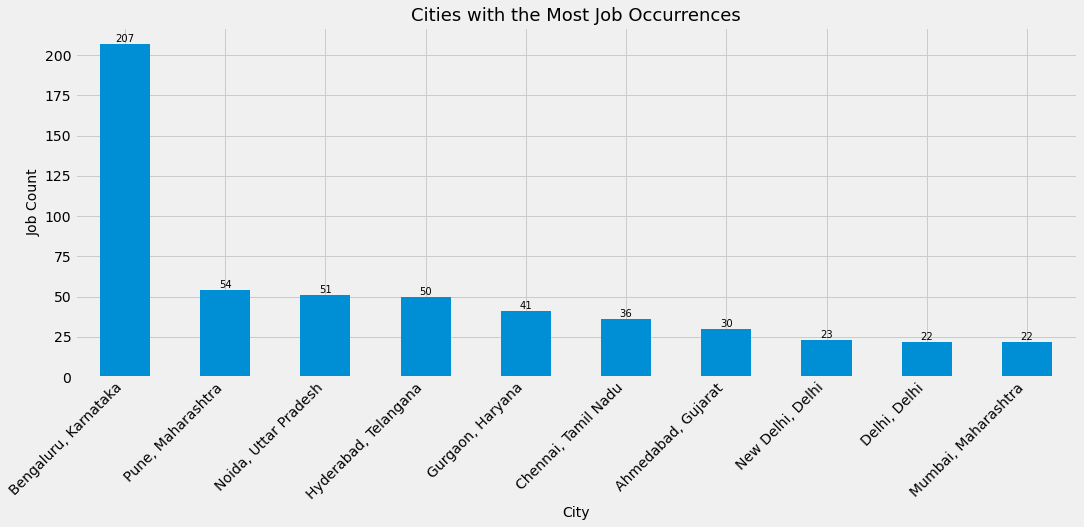

In [25]:
# Creating a bar graph for the top 10 cities with most job occurrences
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,6)

top_cities = city_counts.head(10)
top_cities.plot(kind='bar')
plt.title('Cities with the Most Job Occurrences', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Job Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Annotate the bar graph with salary values rounded to 2 decimal places
for i, v in enumerate(top_cities):
    plt.text(i, v, f'{v}', ha='center', va='bottom', fontsize=10)

plt.show()

In [27]:
# Checkking top 10 cities with highest salary for Python Developers
grouped_data = df.groupby('Location')
# Calculating the maximum salary for each city
max_salaries = grouped_data['Processed Salary'].apply(lambda x: np.max(x))
max_salaries.sort_values(ascending=False).head(10)

Location
Noida, Uttar Pradesh              416667.0
Gurgaon, Haryana                  250000.0
Hyderabad, Telangana              225000.0
Delhi, Delhi                      187500.0
Bengaluru, Karnataka              177083.0
Pune, Maharashtra                 166667.0
New Delhi, Delhi                  166667.0
Udaipur, Rajasthan                150000.0
Chennai, Tamil Nadu               150000.0
Madhapur, Hyderabad, Telangana    133333.0
Name: Processed Salary, dtype: float64

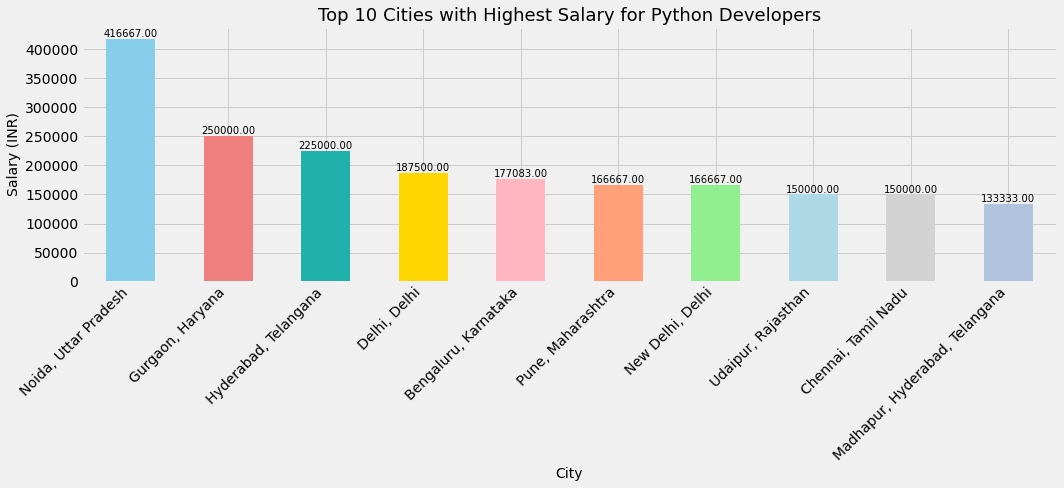

In [28]:
# Creating a bar graph for the top 10 cities with highest salary
top_10_cities = max_salaries.sort_values(ascending=False).head(10)

# Defining colors for each bar
colors = ['skyblue', 'lightcoral', 'lightseagreen', 'gold', 'lightpink', 'lightsalmon', 'lightgreen', 'lightblue', 'lightgray', 'lightsteelblue']

plt.figure(figsize=(15, 7))
top_10_cities.plot(kind='bar', color=colors)
plt.title('Top 10 Cities with Highest Salary for Python Developers', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Salary (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bar graph with salary values
for i, v in enumerate(top_10_cities):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [30]:
# Checking highest to lowest average Salary by City
grouped_data = df.groupby('Location')
# Calculating the average salary
average_salaries = grouped_data['Processed Salary'].apply(lambda x: np.mean(x)).round(2)
# Sorting the data
average_salaries = average_salaries.sort_values(ascending=False)
average_salaries

Location
Udaipur, Rajasthan                          150000.0
Madhapur, Hyderabad, Telangana              133333.0
Calcutta Riverside, Kolkata, West Bengal    125000.0
Pune, Maharashtra                            91800.0
Bengaluru, Karnataka                         88331.3
                                              ...   
Saket, Delhi, Delhi                              NaN
Telangana                                        NaN
Tiruchchirappalli, Tamil Nadu                    NaN
Trichur, Kerala                                  NaN
Varanasi, Uttar Pradesh                          NaN
Name: Processed Salary, Length: 90, dtype: float64

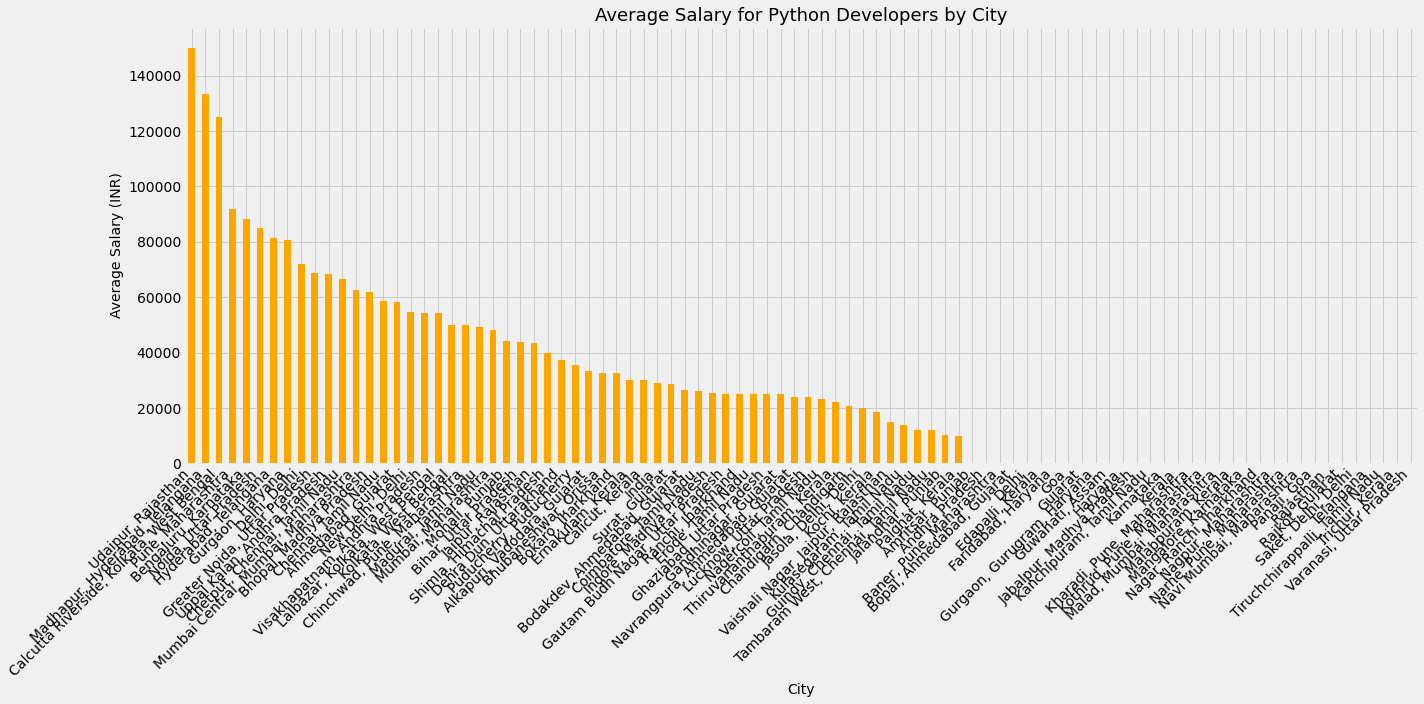

In [31]:
# Creating a bar graph for average salary by City
plt.figure(figsize=(20, 10))

average_salaries.plot(kind='bar', color='orange')
plt.title('Average Salary for Python Developers by City', fontsize = 18)
plt.xlabel('City', fontsize= 14)
plt.ylabel('Average Salary (INR)', fontsize= 14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

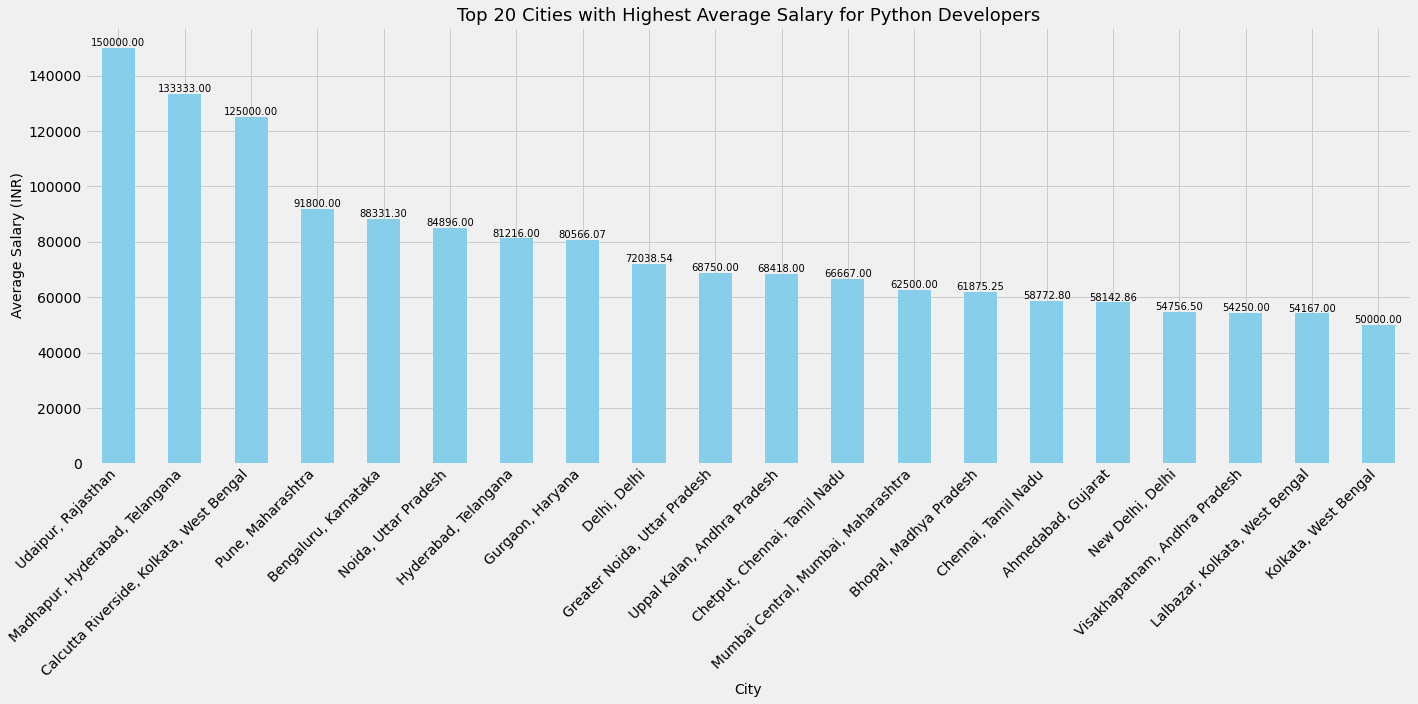

In [33]:
# Creating graph for top 20 Cities with Highest Average Salary

plt.figure(figsize=(20, 10))
top_20_cities = average_salaries.head(20)

top_20_cities.plot(kind='bar', color='skyblue')
plt.title('Top 20 Cities with Highest Average Salary for Python Developers', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Salary (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bar graph with average salary values
for i, v in enumerate(top_20_cities):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

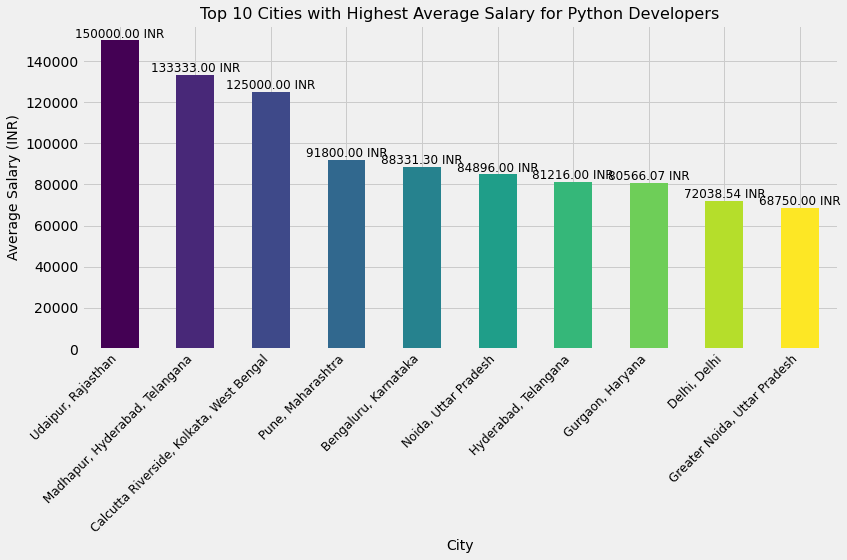

In [34]:


# Group the DataFrame by 'Location' and calculate the average salary for each location
average_salary_by_location = df.groupby('Location')['Processed Salary'].mean()

# Sort the average salaries in descending order and select the top 10 cities
top_10_cities = average_salary_by_location.sort_values(ascending=False).head(10)

# Define a color palette for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_cities)))

# Create a figure with a custom size
plt.figure(figsize=(12, 8))

# Create the bar graph
top_10_cities.plot(kind='bar', color=colors)

# Customize the title and labels
plt.title('Top 10 Cities with Highest Average Salary for Python Developers', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Salary (INR)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add data labels to the bars
for i, v in enumerate(top_10_cities):
    plt.text(i, v, f'{v:.2f} INR', ha='center', va='bottom', fontsize=12)

# Display the plot with improved aesthetics
plt.tight_layout()
plt.show()


Let's create a histogram to visualize the distribution of salaries among Python developers across different cities. Here's the code to create a histogram

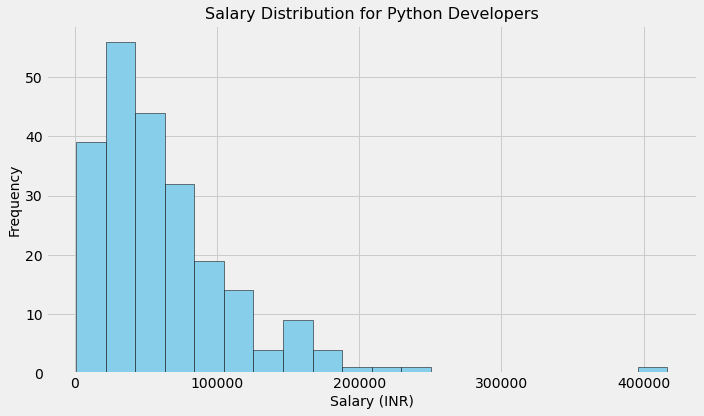

In [35]:


# Filter out NaN salary values
valid_salaries = df['Processed Salary'].dropna()

# Create a histogram of salary distribution
plt.figure(figsize=(10, 6))
plt.hist(valid_salaries, bins=20, color='skyblue', edgecolor='black')

# Customize the title and labels
plt.title('Salary Distribution for Python Developers', fontsize=16)
plt.xlabel('Salary (INR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


## Conclusion

In summary, our salary analysis of Python developer positions in various cities has identified Noida, Uttar Pradesh, as the top-paying location. Gurgaon, Haryana, and Hyderabad, Telangana, also offer competitive salaries, making them attractive options for job seekers.

Other cities, such as Delhi, Bengaluru, Pune, and New Delhi, provide solid salary opportunities for Python developers. Udaipur, Rajasthan, and Chennai, Tamil Nadu, are emerging as potential hubs with growing demand.

This project equips job seekers with valuable insights to make informed career decisions in the Python development field. Whether you prioritize high earnings or consider factors like location and lifestyle, this data can guide your job search.

